<a href="https://colab.research.google.com/github/tamara-kostova/IIS/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
!pip install ndlib

# **Exercise 1**

**Network Definition**

In [234]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.opinions as op

N = 1000
p = 0.1
g = nx.erdos_renyi_graph(N, p)

**Model definition**

In [235]:
models = {
    'SI': ep.SIModel(g),
    'SIS': ep.SISModel(g),
    'SEIS': ep.SEISModel(g),
    'SEIR': ep.SEIRModel(g)
}
for model_name, model_instance in models.items():
    print(f"Model: {model_name}")
    print(f"Parameters: {model_instance.parameters}")
    print(f"Available Statuses: {model_instance.available_statuses}")
    print("\n")

Model: SI
Parameters: {'model': {'beta': {'descr': 'Infection rate', 'range': '[0,1]', 'optional': False}, 'tp_rate': {'descr': 'Whether if the infection rate depends on the number of infected neighbors', 'range': [0, 1], 'optional': True, 'default': 1}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: SIS
Parameters: {'model': {'beta': {'descr': 'Infection rate', 'range': [0, 1], 'optional': False}, 'lambda': {'descr': 'Recovery rate', 'range': [0, 1], 'optional': False}, 'tp_rate': {'descr': 'Whether if the infection rate depends on the number of infected neighbors', 'range': [0, 1], 'optional': True, 'default': 1}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: SEIS
Parameters: {'model': {'alpha': {'descr': 'Incubation period', 'range': [0, 1], 'optional': False}, 'beta': {'descr': 'Infection rate', 'range': [0, 1], 'optional': False}, 'lambda': {'descr': 'Recovery rate', 'range': [0, 1], 'optional':

**Set parameters**

In [236]:
parameters = {
    'SI': {'beta': 0.001, 'fraction_infected': 0.05},
    'SIS': {'beta': 0.001, 'lambda': 0.01, 'fraction_infected': 0.05},
    'SEIS': {'beta': 0.001, 'lambda': 0.01, 'alpha': 0.005, 'fraction_infected': 0.05},
    'SEIR': {'beta': 0.001, 'gamma': 0.01, 'alpha': 0.005, 'fraction_infected': 0.05}
}

**Simulations**

Checking if a state of there's a point in the simulation where the number of susceptible, infected, exposed, and recovered individuals no longer changes significantly with further iterations in order to determine whether a state of equilibrium has been reached. Using a tolerance level for small fluctuations that don't significantly impact the overall system's state

In [237]:
import ndlib.models.ModelConfig as mc
import matplotlib
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend


image_names = []
for model_name, model in models.items():
    config = mc.Configuration()
    params = parameters[model_name]
    for param, value in params.items():
        config.add_model_parameter(param, value)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(200)
    trends = model.build_trends(iterations)

    print(f"{model_name} simulation done.")

    image_name = f"diffusion_{model_name}.jpg"
    image_names.append(image_name)

    viz = DiffusionTrend(model, trends)
    viz.plot(image_name)
    plt.title(f"Diffusion Trend for {model_name} Model")

    tolerance = 1e-5
    equilibrium = all(
        abs(iterations[-1]['node_count'][status] - iterations[-2]['node_count'][status]) < tolerance
        for status in iterations[-1]['node_count']
    )
    if equilibrium:
        print(f"{model_name} reached equilibrium.")
    else:
        print(f"{model_name} has not reached equilibrium.")

SI simulation done.
SI reached equilibrium.
SIS simulation done.
SIS has not reached equilibrium.
SEIS simulation done.
SEIS has not reached equilibrium.
SEIR simulation done.
SEIR has not reached equilibrium.


**Visualizations**

SI


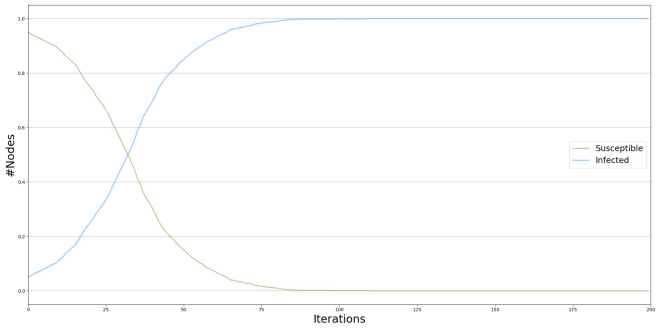

SIS


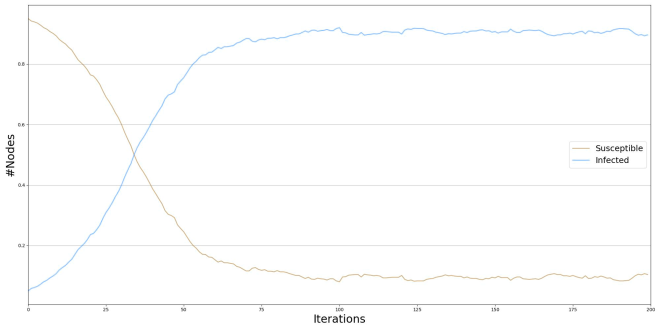

SEIS


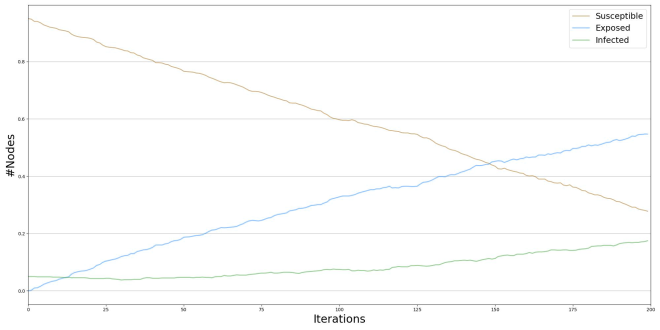

SEIR


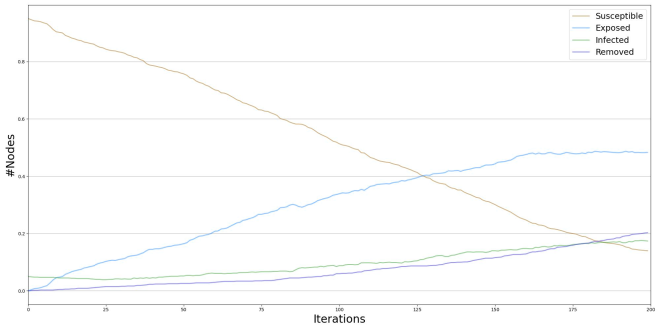

In [238]:
import cv2
from google.colab.patches import cv2_imshow

for image_name, model in zip(image_names, models.keys()):
    print(model)
    img = plt.imread(image_name)
    width = int(img.shape[1] * 0.33)
    height = int(img.shape[0] * 0.33)
    resized_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

    cv2_imshow(resized_img)

# **Exercise 2**

**Network definition**

In [239]:
N = 1000
p = 0.1
g = nx.erdos_renyi_graph(N, p)

**Model definition**

In [240]:
models = {
    'Voter': op.VoterModel(g),
    'QVoter': op.QVoterModel(g),
    'MajorityRuleModel': op.MajorityRuleModel(g),
    'Sznajd': op.SznajdModel(g)
}
for model_name, model_instance in models.items():
    print(f"Model: {model_name}")
    print(f"Parameters: {model_instance.parameters}")
    print(f"Available Statuses: {model_instance.available_statuses}")
    print("\n")

Model: Voter
Parameters: {'model': {}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: QVoter
Parameters: {'model': {'q': {'descr': 'Number of neighbours that affect the opinion of an agent', 'range': [0, 1000], 'optional': False}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: MajorityRuleModel
Parameters: {'model': {'q': {'descr': 'Number of randomly chosen voters', 'range': [0, 1000], 'optional': False}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}


Model: Sznajd
Parameters: {'model': {}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}




**Simulation**

Checking if a state of there's a point in the simulation where the number of susceptible, infected, exposed, and recovered individuals no longer changes significantly with further iterations in order to determine whether a state of equilibrium has been reached. Using a tolerance level for small fluctuations that don't significantly impact the overall system's state

In [241]:
image_names=[]
for model_name, model in models.items():
    config = mc.Configuration()

    config.add_model_parameter('q', 4)

    model.set_initial_status(config)

    iterations = model.iteration_bunch(200)
    trends = model.build_trends(iterations)

    print(f"{model_name} simulation done.")

    image_name = f"diffusion_{model_name}.jpg"
    image_names.append(image_name)

    viz = DiffusionTrend(model, trends)
    viz.plot(image_name)
    plt.title(f"Diffusion Trend for {model_name} Model")

    tolerance = 1e-5
    equilibrium = all(
        abs(iterations[-1]['node_count'][status] - iterations[-2]['node_count'][status]) < tolerance
        for status in iterations[-1]['node_count']
    )
    if equilibrium:
        print(f"{model_name} reached equilibrium.")
    else:
        print(f"{model_name} has not reached equilibrium.")

Voter simulation done.


/usr/local/lib/python3.10/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


Voter reached equilibrium.
QVoter simulation done.


/usr/local/lib/python3.10/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


QVoter reached equilibrium.
MajorityRuleModel simulation done.


/usr/local/lib/python3.10/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


MajorityRuleModel reached equilibrium.
Sznajd simulation done.


/usr/local/lib/python3.10/dist-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


Sznajd reached equilibrium.


Visualizations

Voter


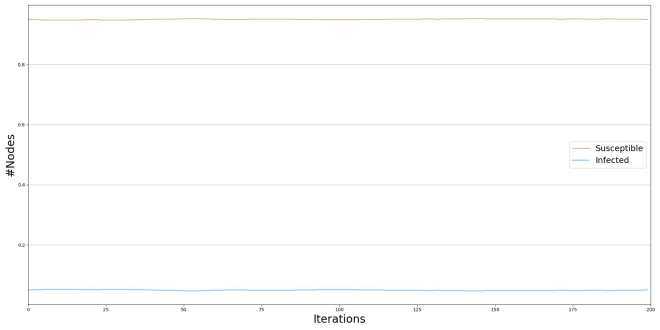

QVoter


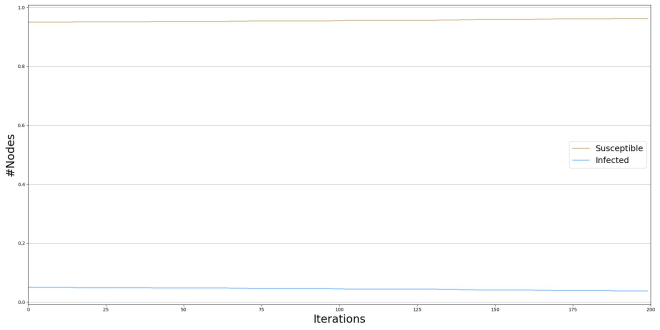

MajorityRuleModel


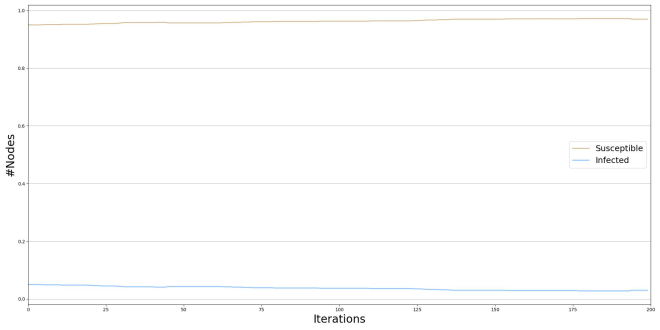

Sznajd


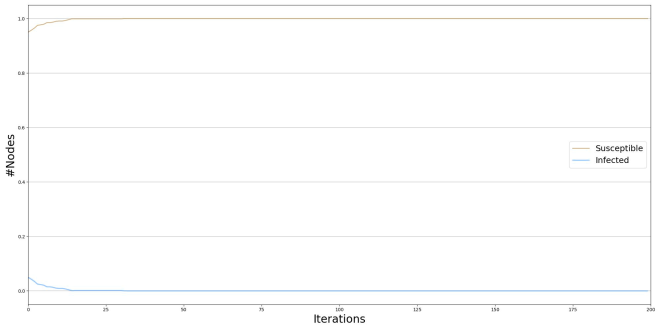

In [242]:
import cv2
from google.colab.patches import cv2_imshow

for image_name, model in zip(image_names, models.keys()):
    print(model)
    img = plt.imread(image_name)
    width = int(img.shape[1] * 0.33)
    height = int(img.shape[0] * 0.33)
    resized_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

    cv2_imshow(resized_img)

# **Exercise 3**

**Graph configuration**

In [243]:
g = nx.read_edgelist("drive/MyDrive/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [244]:
g

**Models**

In [245]:
models = {
    'Voter': op.VoterModel(g),
    'QVoter': op.QVoterModel(g),
    'MajorityRule': op.MajorityRuleModel(g),
    'Sznajd': op.SznajdModel(g)
}

**Set parameters**

In [246]:
parameters = {
    'Voter': {'percentage_infected': 0.1},
    'QVoter': {'percentage_infected': 0.1, 'q': 3},
    'MajorityRule': {'percentage_infected': 0.1, 'q': 3},
    'Sznajd': {'percentage_infected': 0.1}
}

**Simulations**

In [247]:
image_names=[]
for model_name, model in models.items():
    config = mc.Configuration()
    for param, value in parameters[model_name].items():
        config.add_model_parameter(param, value)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(200)
    trends = model.build_trends(iterations)

    print(f"{model_name} simulation done.")

    image_name = f"facebook{model_name}.jpg"
    image_names.append(image_name)

    viz = DiffusionTrend(model, trends)
    viz.plot(image_name)
    plt.title(f"Diffusion Trend for {model_name} Model")

    tolerance = 1e-5
    equilibrium = all(
        abs(iterations[-1]['node_count'][status] - iterations[-2]['node_count'][status]) < tolerance
        for status in iterations[-1]['node_count']
    )
    if equilibrium:
        print(f"{model_name} reached equilibrium.")
    else:
        print(f"{model_name} has not reached equilibrium.")

Voter simulation done.
Voter reached equilibrium.
QVoter simulation done.
QVoter reached equilibrium.
MajorityRule simulation done.
MajorityRule reached equilibrium.
Sznajd simulation done.
Sznajd reached equilibrium.


**Visualization**

Voter


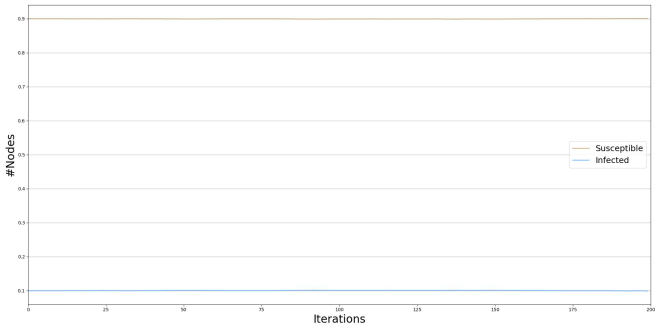

QVoter


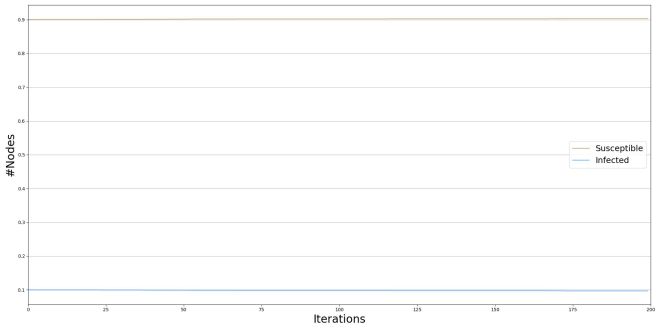

MajorityRule


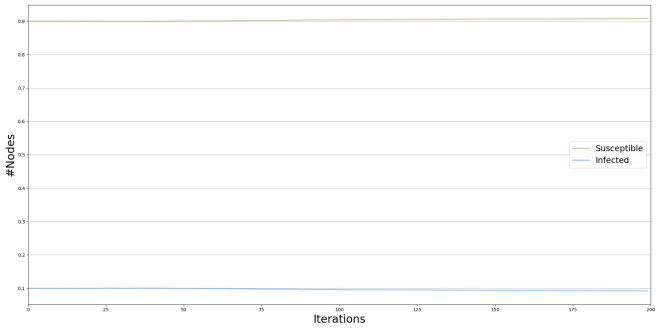

Sznajd


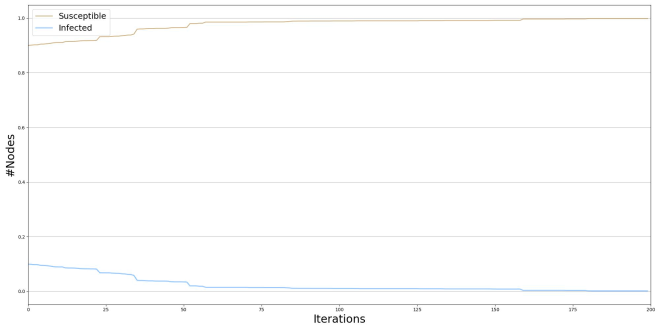

In [248]:
import cv2
from google.colab.patches import cv2_imshow

for image_name, model in zip(image_names, models.keys()):
    print(model)
    img = plt.imread(image_name)
    width = int(img.shape[1] * 0.33)
    height = int(img.shape[0] * 0.33)
    resized_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

    cv2_imshow(resized_img)